In [18]:
import json

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pathlib
from plot_style import *

USE_MARKERS = False

%ls experiments/aggr_comparison/

2024-03-20 13:05:46/ 2024-03-20 20:53:24/ 2024-03-21 19:41:54/
2024-03-20 15:27:27/ 2024-03-20 21:46:52/ 2024-03-21 20:11:51/
2024-03-20 15:59:30/ 2024-03-20 23:25:21/ 2024-03-21 20:56:58/
2024-03-20 16:45:38/ 2024-03-21 00:10:48/ 2024-03-21 21:24:32/
2024-03-20 16:53:02/ 2024-03-21 00:24:04/ 2024-03-21 21:35:30/
2024-03-20 17:07:23/ 2024-03-21 00:41:29/ 2024-03-21 21:53:57/
2024-03-20 17:28:58/ 2024-03-21 01:27:20/ 2024-03-21 21:58:53/
2024-03-20 17:55:42/ 2024-03-21 15:28:12/ 2024-03-21 22:05:49/
2024-03-20 18:49:08/ 2024-03-21 16:18:40/ 2024-03-21 22:10:33/
2024-03-20 19:13:34/ 2024-03-21 16:31:03/ 2024-03-21 22:17:15/
2024-03-20 19:27:31/ 2024-03-21 16:43:05/ 2024-03-21 22:41:55/
2024-03-20 19:45:39/ 2024-03-21 17:46:23/ 2024-03-22 00:35:27/


In [19]:
l = list(pathlib.Path("./experiments/aggr_comparison/").iterdir())
l = sorted(l)
recent_dir = l[-1]
recent_dir

PosixPath('experiments/aggr_comparison/2024-03-22 00:35:27')

In [20]:
with open(recent_dir / "config.json", "r") as f:
    config = json.load(f)
config

{'num_global_rounds': 200,
 'num_worker_nodes': 1000,
 'max_workers': 10,
 'participation': 0.01,
 'alpha': 0.001}

In [21]:
df = pd.read_feather(recent_dir / "results.feather")
df.head()

,train/acc,train/loss,train/epoch,train/batch_idx,train/time,node/idx,node/kind,parent/idx,parent/kind,round,test/acc,test/loss,train/rel_time,strategy,labels_alpha,samples_alpha
0,0.75,2.206407,0,0,2024-03-21 22:52:20.488298,994,worker,0,leader,0,0.1691,2.304828,3.317661,fedprox,0.01,2.0
1,1.00,2.192468,0,1,2024-03-21 22:52:20.519342,994,worker,0,leader,0,0.1691,2.304828,3.348705,fedprox,0.01,2.0
2,1.00,2.177765,1,0,2024-03-21 22:52:20.581241,994,worker,0,leader,0,0.1691,2.304828,3.410604,fedprox,0.01,2.0
3,1.00,2.164620,1,1,2024-03-21 22:52:20.592175,994,worker,0,leader,0,0.1691,2.304828,3.421538,fedprox,0.01,2.0
4,1.00,2.148252,2,0,2024-03-21 22:52:20.637472,994,worker,0,leader,0,0.1691,2.304828,3.466835,fedprox,0.01,2.0


In [22]:
df["test/acc"].describe()

count    174850.000000
mean          0.514757
std           0.216090
min           0.071500
25%           0.342500
50%           0.579300
75%           0.711300
max           0.780100
Name: test/acc, dtype: float64

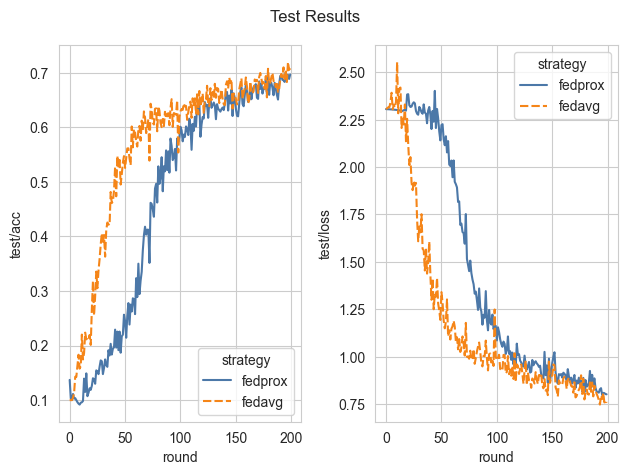

In [23]:
# sns.lineplot(df, x="train/time", y="train/loss", errorbar=None)
# plt.xlabel("Time", weight="bold")
# plt.ylabel("Training Loss", weight="bold")
# plt.show()

fig, ax = plt.subplots(nrows=1, ncols=2)
sns.lineplot(df, x="round", y="test/acc", hue="strategy", style="strategy", markers=USE_MARKERS, markersize=10,
             ax=ax[0], errorbar=None)
sns.lineplot(df, x="round", y="test/loss", hue="strategy", style="strategy", markers=USE_MARKERS, markersize=10,
             ax=ax[1], errorbar=None)
plt.suptitle("Test Results")
plt.tight_layout()
plt.show()

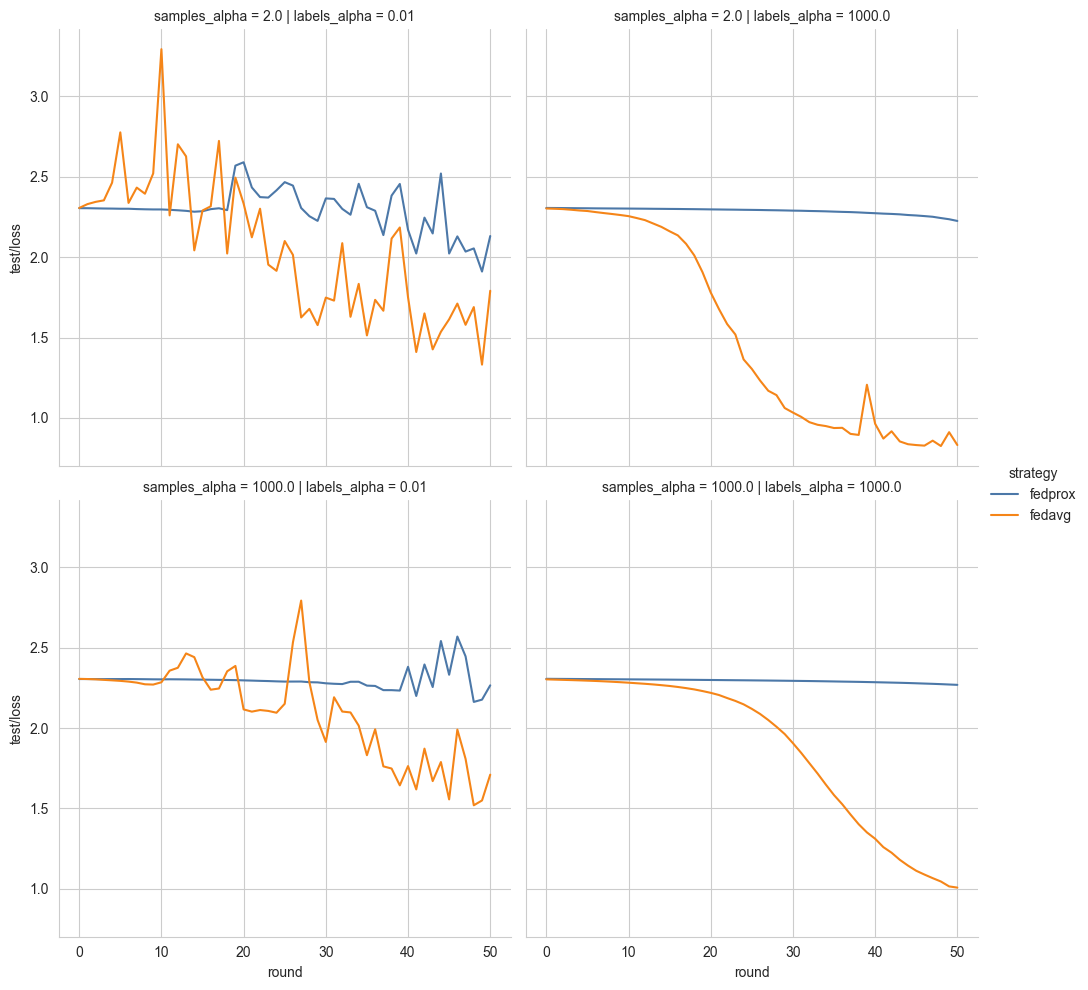

In [24]:
sns.relplot(
    df.query("round <= 50"), kind="line", x="round", y="test/loss", row="samples_alpha", col="labels_alpha",
    hue="strategy",
    errorbar=None)
plt.show()

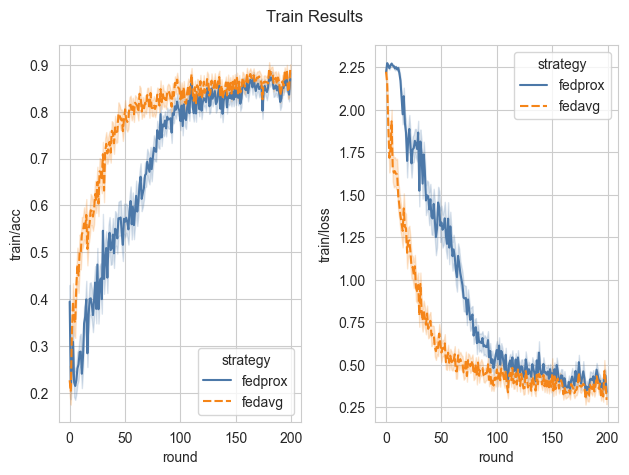

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2)
sns.lineplot(df, x="round", y="train/acc", hue="strategy", style="strategy", markers=USE_MARKERS, markersize=10,
             ax=ax[0])
sns.lineplot(df, x="round", y="train/loss", hue="strategy", style="strategy", markers=USE_MARKERS, markersize=10,
             ax=ax[1])
plt.suptitle("Train Results")
plt.tight_layout()
plt.show()

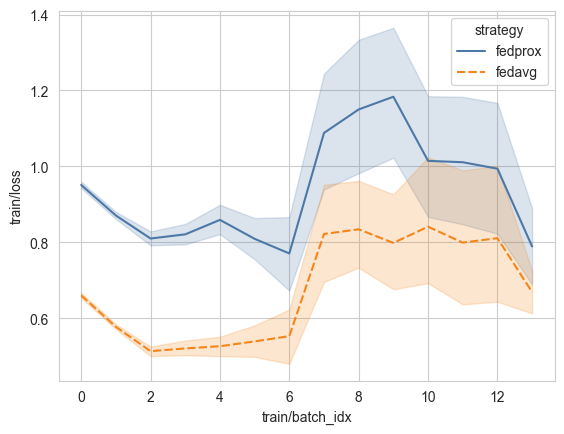

In [26]:
sns.lineplot(df, x="train/batch_idx", y="train/loss", hue="strategy", style="strategy")
# plt.xlabel("Round #", weight="bold")
# plt.ylabel("Training Loss", weight="bold")
plt.show()

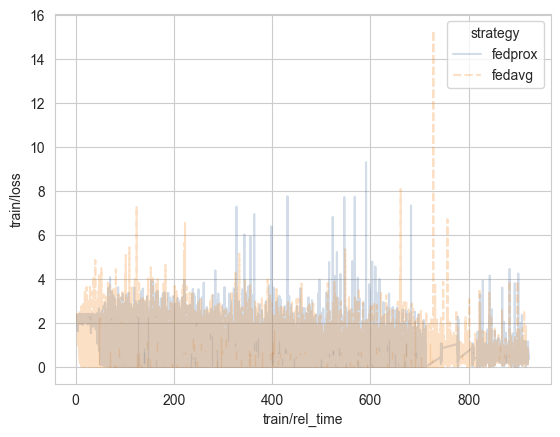

In [27]:
sns.lineplot(df, x="train/rel_time", y="train/loss", hue="strategy", style="strategy", alpha=0.25)
plt.show()

In [28]:
df["train/time"].dtype

dtype('<M8[ns]')

In [29]:
hier_df = pd.read_feather("my_hier_results.feather")
hier_df.head()

,train/loss,train/epoch,train/batch_idx,train/time,node/idx,node/kind,parent/idx,parent/kind,round,train/rel_time,strategy
0,2.262590,0.0,9.0,2024-03-18 11:42:40.801114,6,worker,1,aggregator,0,3.190576,fedprox
1,2.250182,1.0,9.0,2024-03-18 11:42:41.302960,6,worker,1,aggregator,0,3.692422,fedprox
0,2.299859,0.0,9.0,2024-03-18 11:42:40.887281,7,worker,1,aggregator,0,3.276743,fedprox
1,2.305941,0.0,19.0,2024-03-18 11:42:41.299714,7,worker,1,aggregator,0,3.689176,fedprox
2,2.293489,1.0,9.0,2024-03-18 11:42:42.183764,7,worker,1,aggregator,0,4.573226,fedprox


In [30]:
print(hier_df["parent/idx"].unique())
print(hier_df["node/idx"].unique())

[1 2 3 4 5]
[ 6  7  8 12 13 15 17 18 21 25 28]


In [31]:
# sns.lineplot(hier_df, x="round", y="train/loss", hue="strategy", style="strategy")
# # plt.xlabel("Round #", weight="bold")
# # plt.ylabel("Training Loss", weight="bold")
# plt.show()

AttributeError: 'NoneType' object has no attribute 'remove'

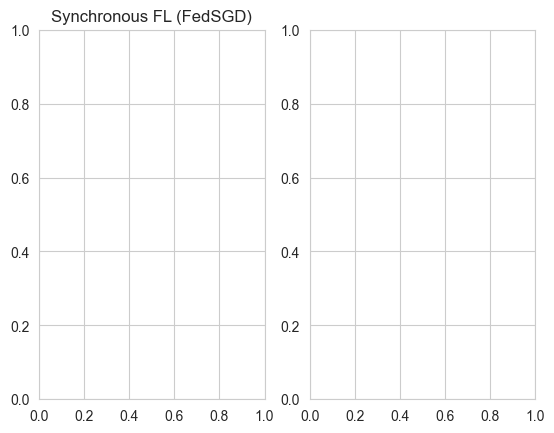

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=2)

sns.scatterplot(
    df.query("strategy == 'fedsgd'"),
    x="train/rel_time",
    y="round",
    hue="node/idx",
    ax=ax[0],
)
ax[0].set_title("Synchronous FL (FedSGD)")
# ax[0].axvline(6.6, color="black", linestyle="--")
ax[0].get_legend().remove()

sns.scatterplot(
    df.query("strategy == 'fedasync'"),
    x="train/rel_time",
    y="round",
    hue="node/idx",
    ax=ax[1],
)
ax[1].set_title("Asynchronous FL")

plt.show()

In [ ]:
print(f"{len(df):,}")